# Введение в машинное обучение

In [1]:
import pandas as pd
import random
from IPython.display import Image
from setup import *
import runge_example
plt.rcParams['font.size'] = 12

%load_ext autoreload

%autoreload 2

# Машинное обучение в философском смысле (супер кратко)

**Машинное обучение** — это наука, изучающая алгоритмы, автоматически улучшающиеся благодаря опыту.

Когда Алан Тьюринг работал над первыми (компьютерами), он пытался расшифровать сообщения немецких военных, закодированные машиной Энигма. Поиск расшифровки требовал перебора массы вариантов. Люди с этой задачей справлялись плохо, зато машина могла решить её сравнительно быстро. Очевидно, далеко не для каждой задачи, с которой люди справляются с трудом, можно написать программу для эффективного поиска решения. Более того, есть целый класс задач (так называемые [NP-трудные задачи](https://ru.wikipedia.org/wiki/NP-трудность)), которые нельзя решить за разумное время. Можно даже явно доказать, что никакой компьютер здесь чуда тоже не совершит. Самое интересное это то, что бывают и задачи, которые для людей особенного труда не составляют, но которые почему-то крайне трудно запрограммировать, например:

* перевести текст с одного языка на другой;

* диагностировать болезнь по симптомам;

* сравнить, какой из двух документов в интернете лучше подходит под данный поисковый запрос;

* сказать, что изображено на картинке;

* оценить, по какой цене удастся продать квартиру.

У всех этих задач есть много общего. Во-первых, их решение можно записать как функцию, которая отображает объекты или примеры (samples) в предсказания (targets). Например, больных надо отобразить в диагнозы, а документы в оценку релевантности. Во-вторых, вряд ли у этих задач есть единственно верное, идеальное решение. Даже профессиональные переводчики могут по-разному перевести один и тот же текст, и оба перевода будут верными. Так что лучшее в этих задачах — враг хорошего. В конце концов, и доктора иногда делают ошибки в диагнозах, и вы не всегда можете сказать, что же именно изображено на картинке. В-третьих, у нас есть много примеров правильных ответов (скажем, переводов предложения на другой язык или подписей к заданной картинке), а примеры неправильных ответов (если они нужны), как правило, не составляет труда сконструировать. Мы назовём функцию, отображающую объекты в предсказания, — моделью, а имеющийся у нас набор примеров — обучающей выборкой или датасетом. Обучающая выборка состоит из:

* **объектов** (к примеру, скачанные из интернета картинки, истории больных, активность пользователей сервиса и так далее);

* и **ответов** (подписи к картинкам, диагнозы, информация об уходе пользователей с сервиса), которые мы также будем иногда называть **таргетами**.


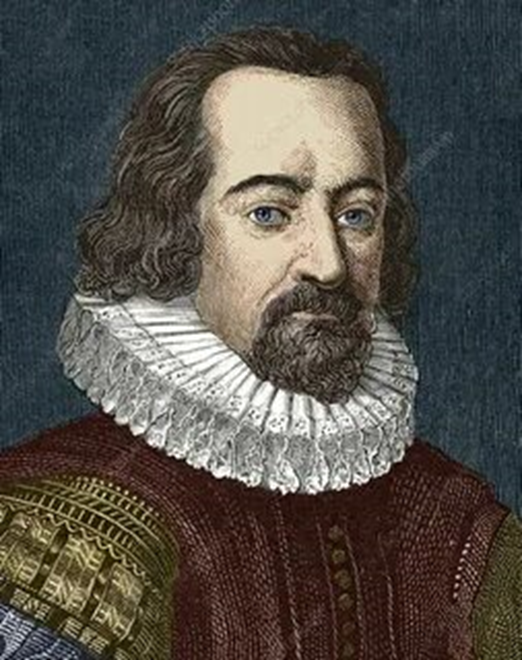

«Не следует полагаться на сформулированные аксиомы и формальные базовые понятия, какими бы привлекательными и справедливыми они не казались. Законы природы нужно «расшифровывать» из фактов опыта. **Следует искать правильный метод анализа и обобщения опытных данных**; здесь логика Аристотеля не подходит в силу её абстрактности, оторванности от реальных процессов и явлений» (Фрэнсис Бэкон (1561 – 1626))


**Вопрос:** Как в повседневной жизни мы взаимодействуем с ИИ?

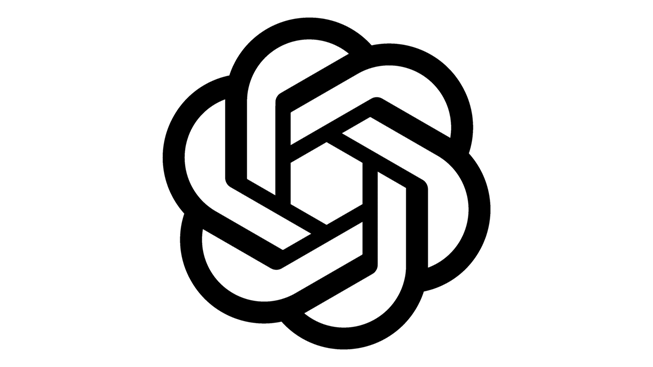

ChatGpt — чат-бот с генеративным ИИ, разработанный компанией OpenAI


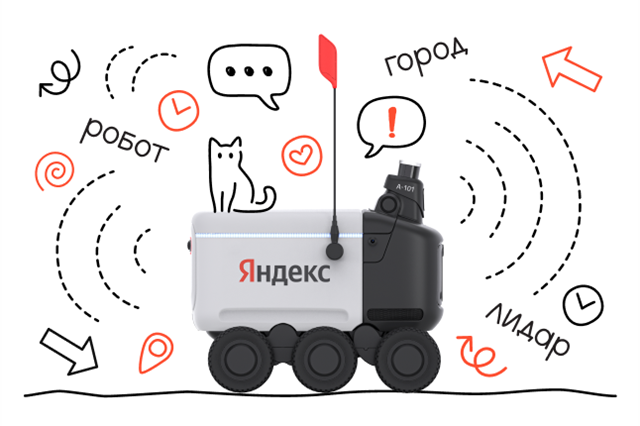

Робот-доставщик Яндекса или Ровер Яндекса — автономное устройство компании «Яндекс» для доставки грузов, посылок, почты.


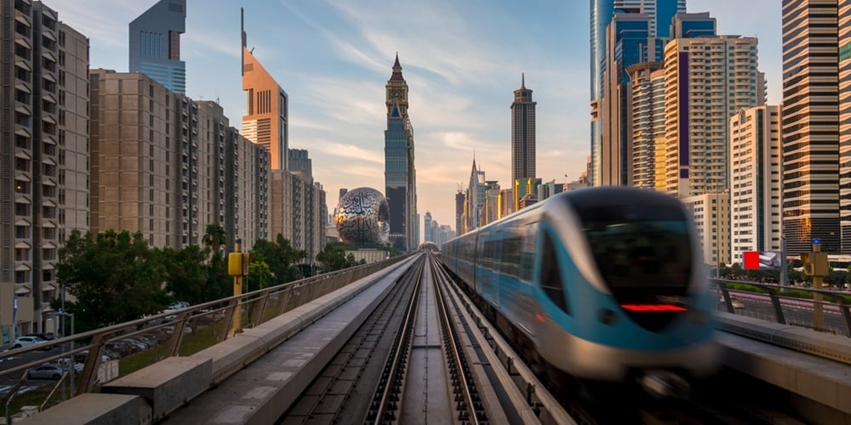

Беспилотное метро в Дубае (ОАЭ) —полностью автоматизированная система общественного транспорта, где поезда двигаются без машинистов.


Перед тем, как мы перейдем к формальной постановке задачи ML, нам необходимо ввести несколько понятий, с которыми предстоит часто взаимодействовать

# Тезаурус

Почти все научные исследования и статьи в области ML написаны и развиваются на английском языке. Сначала мы посмотрим их в оригинальном виде, а затем дадим русские интерпретации при возможности. Стоит сразу отметить, что т. к. область ML достаточно молодая (по сравнению с другими разделами математики), то не существуют общепринятных обозначений, а некоторые термины вообще не переводятся на русский язык.

Есть обозначения, признанные неким золотым стандартом в ML, их можно почитать в `Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville (2016)`

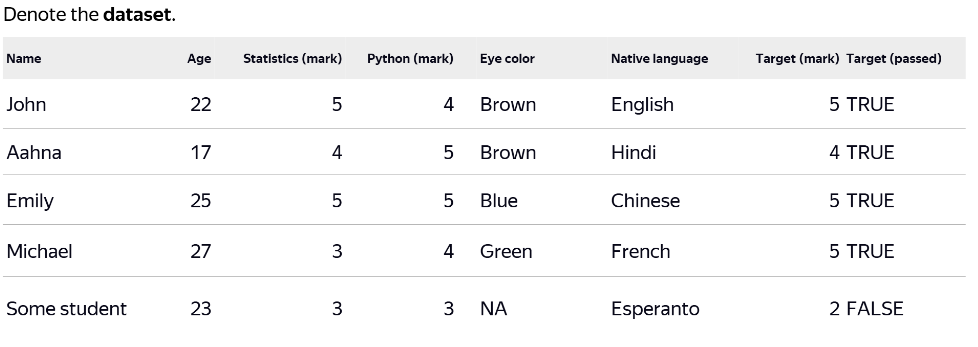

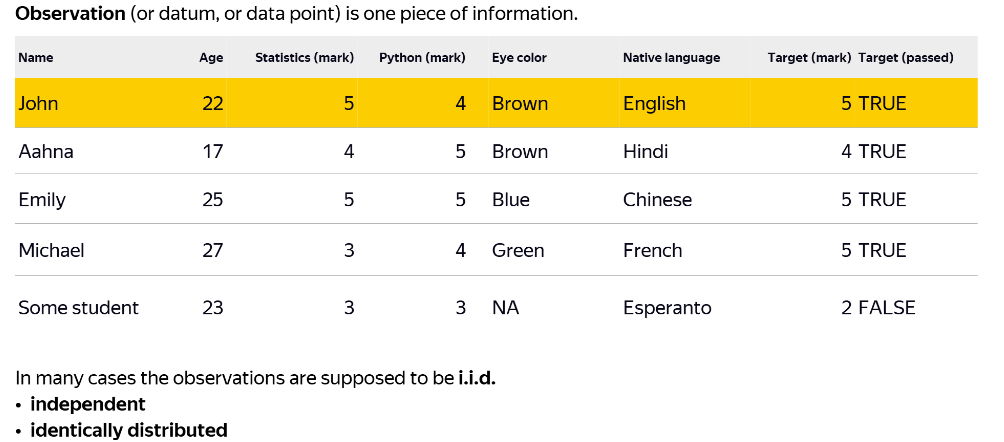

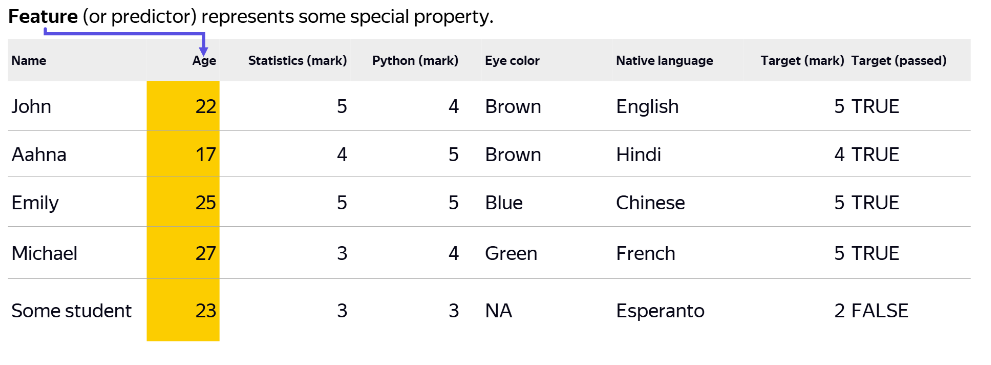

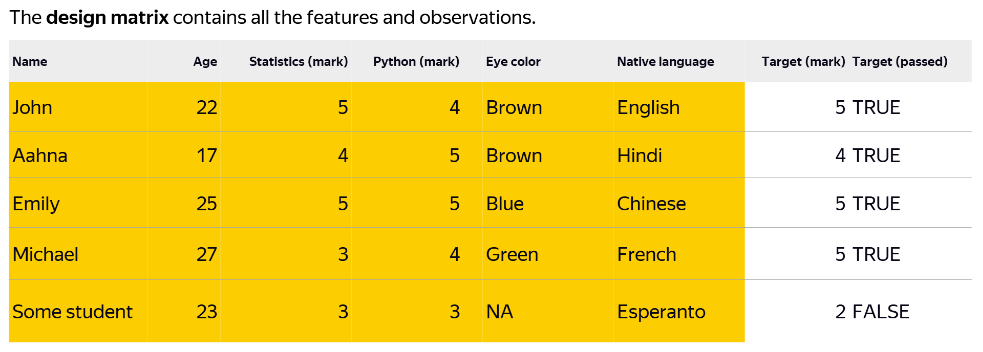

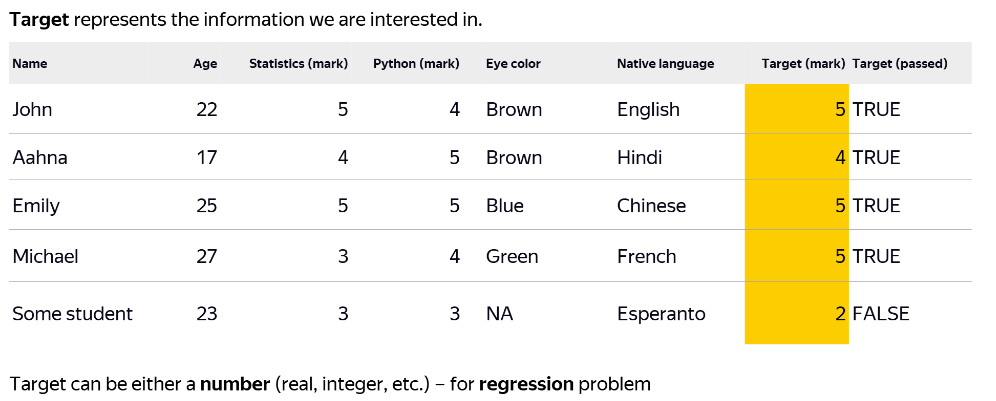

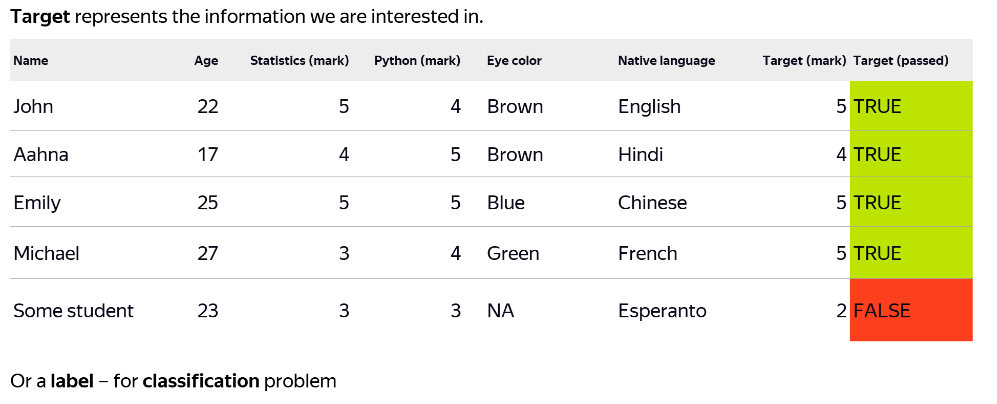

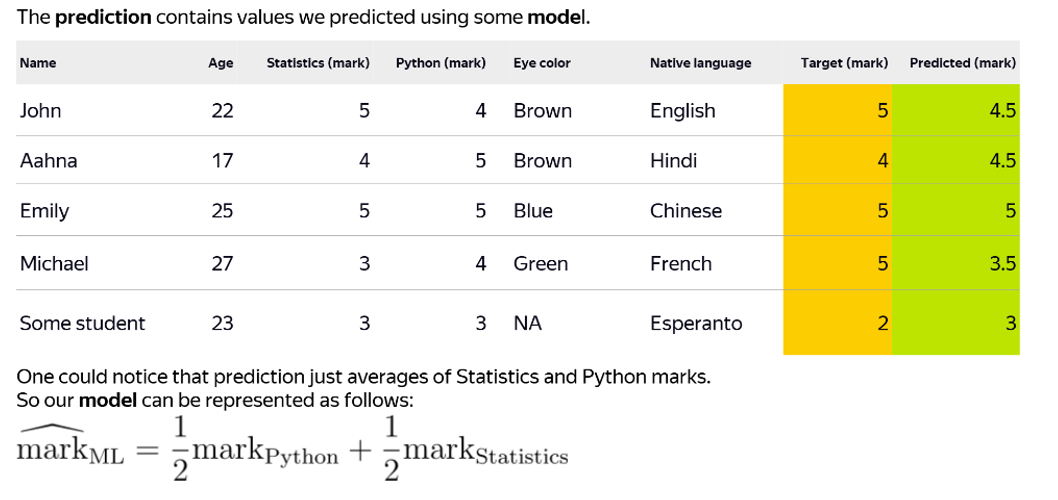

# Постановка задачи ML

**Машинное обучение** - это раздел из области прикладной математики. По своей сути любая задача содержит ДНК (**Дано**, **Найти** и **Критерий**, по мнению К. В. Воронцова). Давайте ввёдем постановку задачи машинного обучения с точки зрения задачи оптимизации.

# Математическая постановка задачи обучения

$X$ — пространство объектов  
$Y$ — множество ответов (предсказаний / оценок / прогнозов)  
$y(x)$, $y: X \to Y$ — неизвестная зависимость (target function)  

### Дано:  
$\{x_1, \ldots, x_\ell\} \subset X$ — обучающая выборка (training sample)  
$a(x, w)$, $a: X \times W \to Y$ — параметрическая модель зависимости  

### Найти:  
$w \in W$ — вектор параметров модели такой, что $a(x, w) \approx y(x)$  

### Критерий — минимум эмпирического риска:  
$$
\sum_{i=1}^\ell \mathcal{L}(w, x_i) \to \min_W \quad \text{(empirical risk minimization, ERM)}
$$
где $\mathcal{L}(w, x)$ — функция потерь (loss function) — тем больше, чем сильнее $a(x, w)$ отклоняется от правильного ответа $y(x)$

Вот пример, если loss function = МНК:
$$
\mathcal{L_i}(w, x_i, y_i) = (y_i - a(x_i, w))^2
$$

А сам функционал ошибки записывают так:

$$
Q(a, X, Y) = \frac{1}{n}\sum_{i=1}^{n}\mathcal{L_i}(w, x_i, y_i)=\frac{1}{n}\sum_{i=1}^{n}(y_i - a(x_i, w))^2 \rightarrow \min_{w}
$$


## Виды обучения в ML

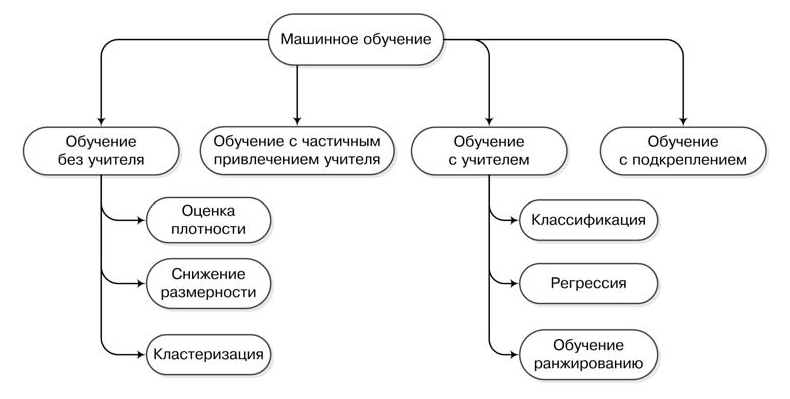

Источник: С. Николенко "Глубокое обучение. Погружение в мир нейронных сетей"

## Как задаются объекты

$f_j : X \to D_j$, $j = 1, \ldots, n$ — признаки объектов (features)

Что такое признаки (features)? Некие простые значения.

Обычно признаки делят на типы, например: 
- `Бинарные`: $\{0, 1\}$
- `Количественные`: $f(x) \in \mathbb{Q}, \mathbb{R}, \mathbb{C}$
- `Категориальные`: *{Город, Страна, Персонаж в Dota2 и т.д. }*
- `Порядковые`: *{ Уровень образования(Бакалавр, Магистр,...), Ранг в CS и т.д. }*

Вектор $(f_1(x), \ldots, f_n(x))$ — признаковое описание объекта $x$

Матрица «объекты–признаки» (feature data)

$$
F = \|f_j(x_i)\|_{\ell \times n} = 
\begin{pmatrix}
f_1(x_1) & \cdots & f_n(x_1) \\
\vdots & \ddots & \vdots \\
f_1(x_\ell) & \cdots & f_n(x_\ell)
\end{pmatrix}

In [2]:
data = pd.DataFrame(
    {
        "numeric": np.arange(0, 1, 0.3),
        "binary": np.arange(0, 1, 0.3) > 0.4,
        "category": np.array(["dog", "cat", "parrot", "shark"]),
        "ordinal": np.array(["bachelor", "magister", "assistant", "doctor"]),
    }
)
data

,numeric,binary,category,ordinal
0,0.0,False,dog,bachelor
1,0.3,False,cat,magister
2,0.6,True,parrot,assistant
3,0.9,True,shark,doctor


## Как задаются ответы

Описанные ранее задачи являются примерами задач обучения с учителем (**supervised learning**), так как правильные ответы для каждого объекта обучающей выборки заранее известны. Задачи обучения с учителем делятся на следующие виды в зависимости от того, каким может быть множество ${Y}$ всех возможных ответов (таргетов):

1. ${Y} = \mathbb{R}$ или ${Y} = \mathbb{R}^M$ — регрессия. Примерами задач регрессии является предсказание продолжительности поездки на каршеринге, спрос на конкретный товар в конкретный день или погода в вашем городе на завтра (температура, влажность и давление — это несколько вещественных чисел, которые формируют вектор нашего предсказания).

2. ${Y} = \{0, 1\}$ — бинарная классификация. Например, мы можем предсказывать, кликнет ли пользователь по рекламному объявлению, вернёт ли клиент кредит в установленный срок, сдаст ли студент сессию, случится ли определённое заболевание у пациента, есть ли на картинке банан.

3. ${Y} = \{1, \dots, K\}$ — многоклассовая (multiclass) классификация. Например, определение предметной области для научной статьи (математика, биология, психология и т. д.).

4. ${Y} = \{0, 1\}^K$ — многоклассовая классификация с пересекающимися классами (multilabel classification). Например, задача автоматического проставления тегов для ресторанов (логично, что ресторан может одновременно иметь несколько тегов).

5. ${Y}$ — конечное упорядоченное множество — ранжирование. Основным примером является задача ранжирования поисковой выдачи, где для любого запроса нужно отсортировать все возможные документы по релевантности этому запросу; при этом оценка релевантности имеет смысл только в контексте сравнения двух документов между собой, её абсолютное значение информации не несёт.

# Основные задачи ML

На протяжении почти всего курса мы будем рассматривать машинное обучение с учителем (**supervised learning**).

Это то же самое, что и:
 - обучение по прецедентам
 - восстановление зависимостей по эмпирическим данным
 - предсказательное моделирование
 - аппроксимация функций по заданными точкам

В основе, есть две задачи МО
* **Классификация** (${Y}$ - конечное)
* **Регрессия** (${Y}$ - бесконечное)


Для упрощения далее мы будем рассматривать пример **2-х классовой классификации**($|{Y}|=2$) и **регрессии на $\mathbb{R}$** (${Y} = \mathbb{R}$)

### Классификация (Бинарная классификация)

In [14]:
np.random.seed(1337)
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2))  # первый класс
b = np.random.normal(loc=3, scale=2, size=(n, 2))  # второй класс
X = np.vstack([a, b])  # двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)])  # бинарный признак

(400, 2) (400,)


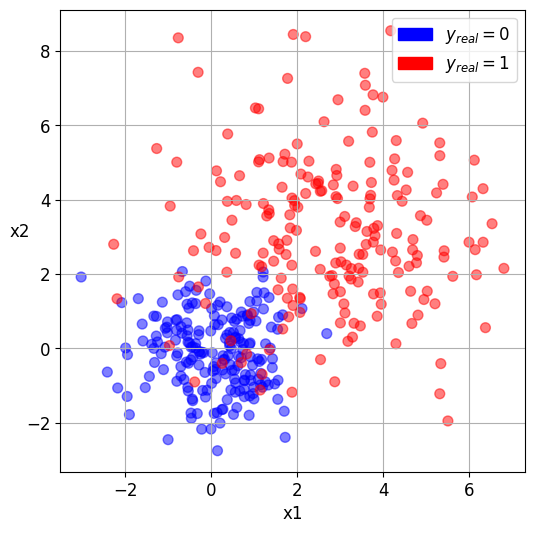

In [17]:
print(X.shape, y.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", s=50, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
blue_patch = mpatches.Patch(color="blue", label="$y_{real}=0$")
red_patch = mpatches.Patch(color="red", label="$y_{real}=1$")
plt.legend(handles=[blue_patch, red_patch])
plt.grid()

### Регрессия
Создадим функцию $\mathcal{F}(x) = \sqrt{x} + sin(x)$. Накинем на неё немного случайного шума: реальные данные никогда не идеальны. Датчики измеряют с погрешностью и иногда сходят с ума, люди путают количество нолей, в памяти компьютеров случаются bit flip'ы ([правда случаются](https://web.archive.org/web/20120113151522/https://status.aws.amazon.com/s3-20080720.html)). В общем, данные всегда следует считать зашумленными, без вариантов.

In [19]:
def f(x):
    return np.sqrt(x) + np.sin(x)


vf = np.vectorize(f)
rng = np.random.RandomState(1)

X_reg = np.arange(0, 10, 0.2)[:, np.newaxis]
y_reg = vf(X_reg) + (rng.rand(50)[:, np.newaxis] / 3)  # добавляем шумы


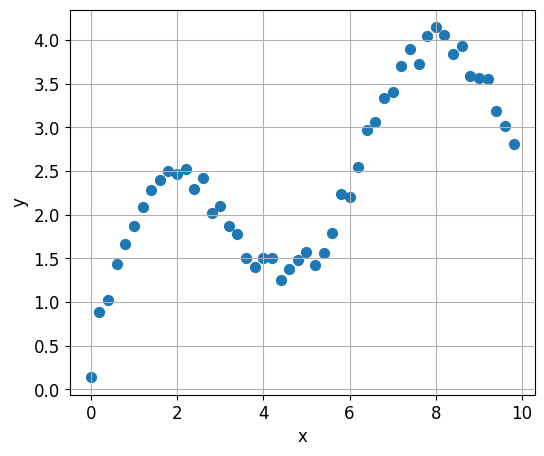

In [20]:
plt.figure(figsize=(6, 5))
plt.scatter(X_reg, y_reg, cmap="bwr", s=50, alpha=1)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()


[[0.25563732]] [1.16652522]


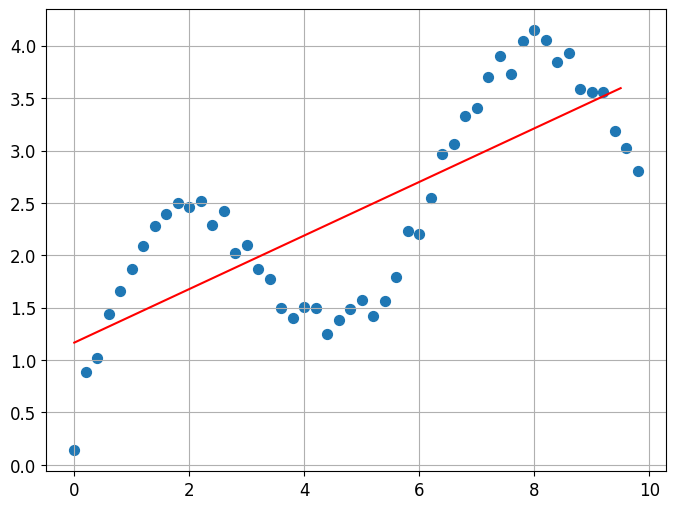

In [21]:
from sklearn.linear_model import LinearRegression as LR

new_y_reg = y_reg

model = LR().fit(X_reg, new_y_reg)

print(model.coef_, model.intercept_)

X_test = np.arange(0, 10, 0.5)[:, np.newaxis]
plot_reg(X_reg, new_y_reg, model, X_test)

# Модель
Модель (predictive model) — параметрическое семейство функций

$$
A = \{a(x, w) \mid w \in W\},
$$

где $a: X \times W \to Y$ — фиксированная функция,  
$W$ — множество допустимых значений параметра $w$

**Пример.**  
Линейная модель с вектором параметров $w = (w_1, \ldots, w_n) \in \mathbb{R}^n$:

$$
a(x, w) = \sum_{j=1}^n w_j f_j(x)
$$

— для регрессии и ранжирования, $Y = \mathbb{R}$

$$
a(x, w) = \text{sign} \sum_{j=1}^n w_j f_j(x)
$$

— для классификации, $Y = \{-1, +1\}$



# Train и Test. Алгоритм обучения

**Этап обучения (train):**  
алгоритм обучения (learning algorithm) $\mu: (X \times Y)^\ell \to W$  
по выборке $X^\ell = (x_i, y_i)_{i=1}^\ell$ строит функцию $a(x, w)$,  
оценивая (оптимизируя) параметры модели $w \in W$:  

$$
\begin{pmatrix}
f_1(x_1) & \cdots & f_n(x_1) \\
\vdots & \ddots & \vdots \\
f_1(x_\ell) & \cdots & f_n(x_\ell)
\end{pmatrix}
\begin{array}{c}
y_1 \\
\vdots \\
y_\ell
\end{array}
\to
\mu
$$

**Этап применения (test):**  
функция $a(x, w)$ для новых объектов $x'_i$ выдаёт ответы $a(x'_i, w)$:  

$$
\begin{pmatrix}
f_1(x'_1) & \cdots & f_n(x'_1) \\
\vdots & \ddots & \vdots \\
f_1(x'_k) & \cdots & f_n(x'_k)
\end{pmatrix}
\to
\begin{pmatrix}
a(x'_1, w) \\
\vdots \\
a(x'_k, w)
\end{pmatrix}
$$

Если просто в картинках, то вот:

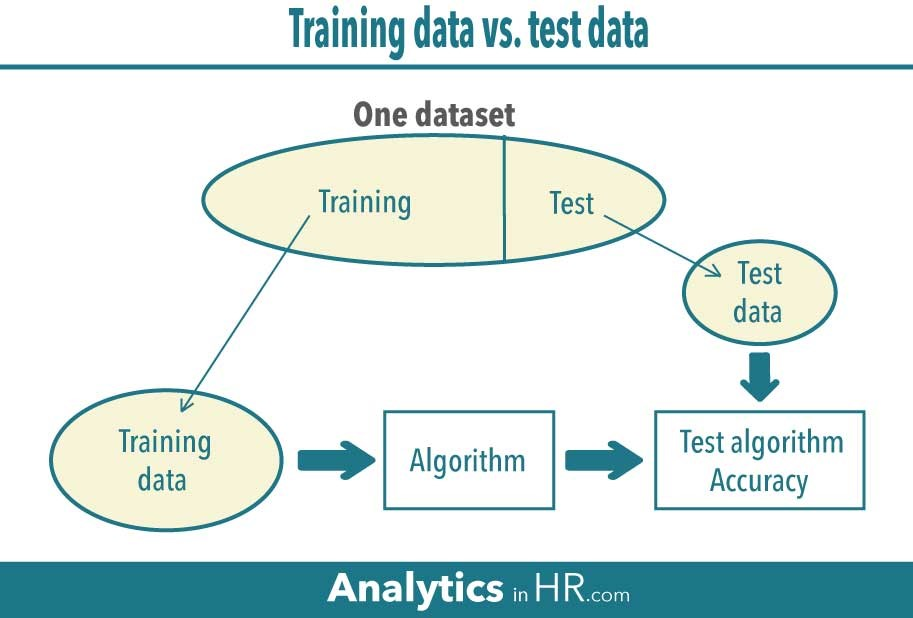

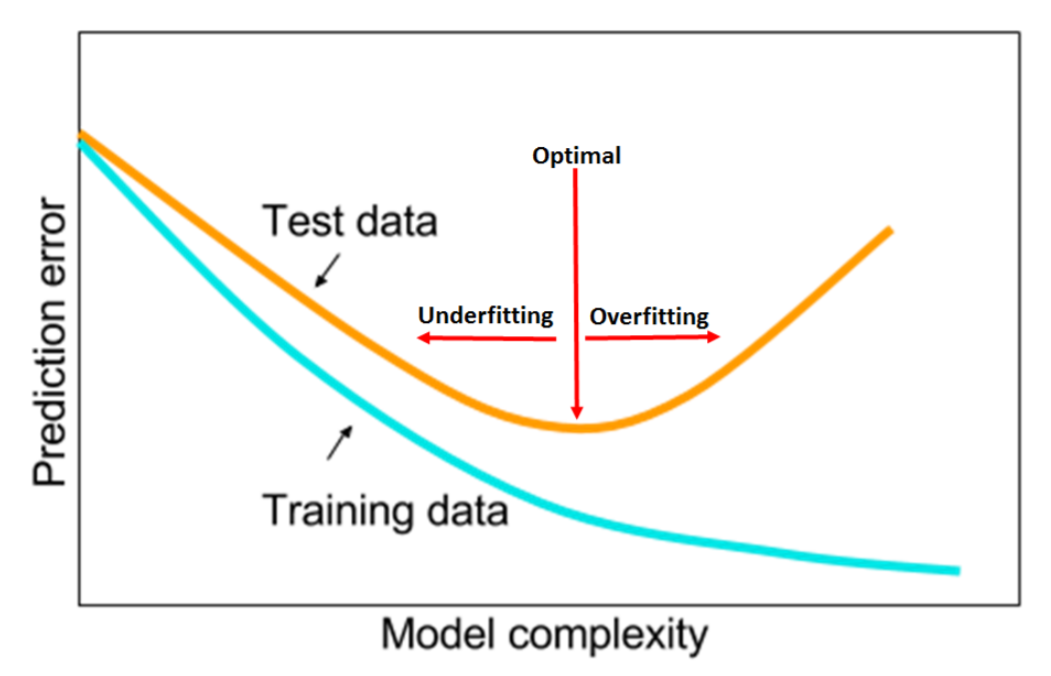


# Качество модели, переобучение

### Пример Рунге

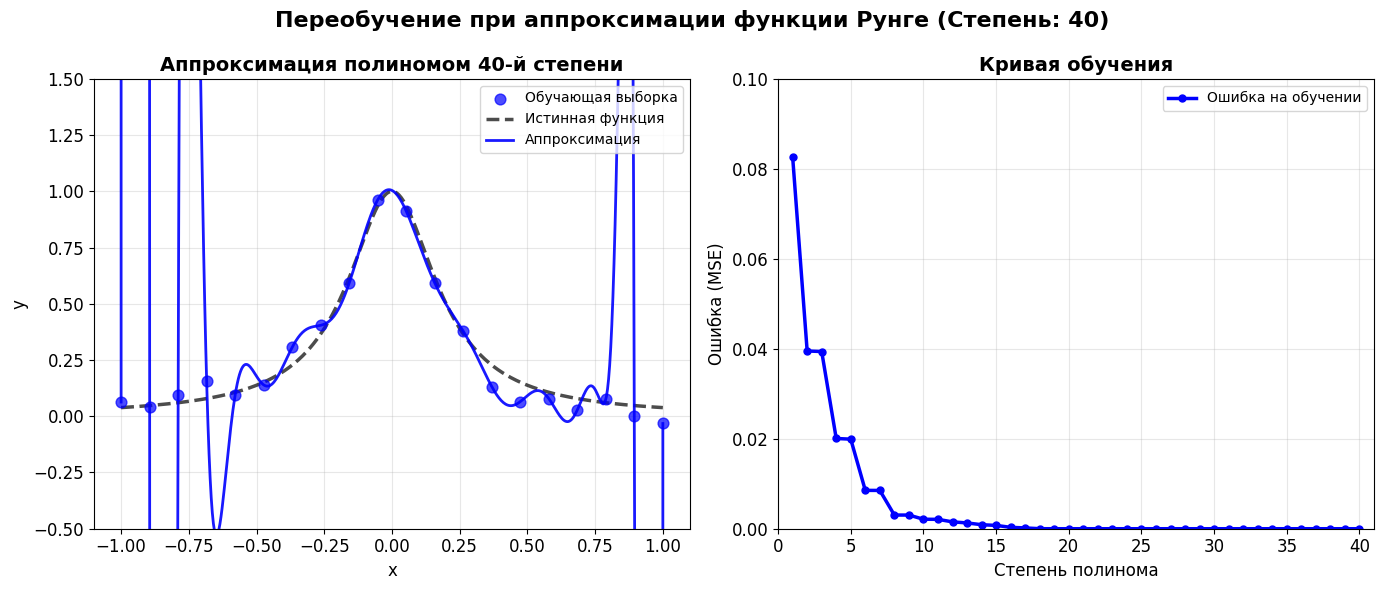

Шаг 40/40: Степень 40, Ошибка = 0.000000


<Figure size 640x480 with 0 Axes>

In [22]:
runge_example.runge_example()

### Недообучение (underfitting) и Переобучение (overfitting)

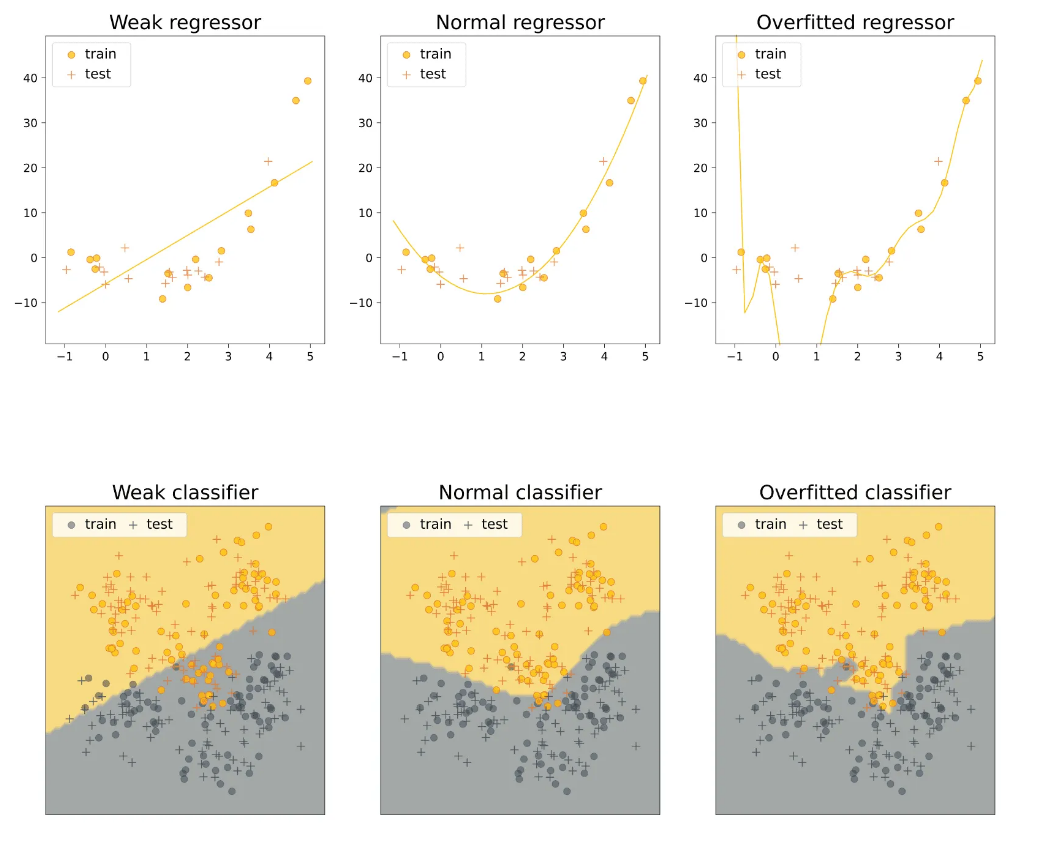

**Переобучение** может возникать в нескольких случаях:
 * Нерепрезентативность выборки в любом смысле: мало данных, или не все классы равнопредставлены или иной дефект. Тогда для алгоритм может обучиться не на общие закономерности в данных, а на какие-то частные взаимосвязи, которые верны для нашей выборки, но не верны в целом.
 * Если в выборке присутствует много `шума` или есть `выбросы`.

`Шум` - небольшие колебания данных, вызванные обычно неточностью приборов, ошибками людей и в целом невозможностью померить все `точно`. Можно считать, что любые данные идут с определенной долей шума.

`Выброс` - серьезное отклонение в данных вызванное ошибками в наблюдениях или естественными аномалиями в данных.

**Недообучение** возникает в том случае, если данных достаточно много, а параметров недостаточно, или используется слмшком простая и негибкая модель для решения задачи.

## Как мерить качество?

Слова "лучше работает" - очень субьективны, не очень понятно, что они означают.

Мы пока что только смотрим на картинки и говорим: **хорошо** или **плохо**. Можно ли как-то объективно и количественно измерить, насколько хорошо обучена модель?

К счастью, да. Для этого существуют `метрики классификации`, и самая простая метрика - `accuracy` или доля правльных ответов. Доля правильных ответов - отношение объектов, которые классифицировались правильно, ко всем объектам.

Пусть нам даны метки $y_{real}$ и результат нашего алгоритма $a(x, w) = y_{pred}$. 

In [24]:
from sklearn.metrics import accuracy_score

y_real = np.array([0, 1, 0, 0, 1, 1, 1, 1])
y_pred = np.array([0, 1, 1, 0, 0, 1, 0, 0])

accuracy_score(y_real, y_pred)

0.5

# kNN - k Nearest Neighbours

Сейчас мы посмотрим первый наш алгоритм машинного обучения - kNN.

Основная идея: 
* сохраняет в себе все точки выборки
* когда хотим предсказать следующую точку, ищем k ближайших точек (по умолчанию точек 5, а метрика расстояния - эвклидова)
* из какого класса точек среди ближайших больше - тот класс и присваивается новой точке.

`Обратите внимание:`
* У этого алгоритма нет никаких параметров в отличие от `LinearRegression`, а значит и отсутсвует loss function $\mathcal{L}$.
* У алгоритма присутсвуют `гиперпараметры`: расстояние, число соседей, веса соседей и т.д.

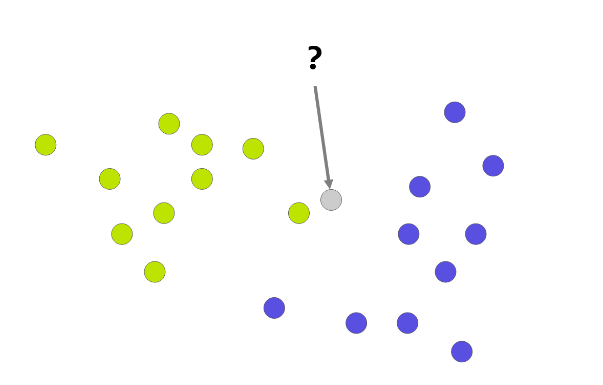

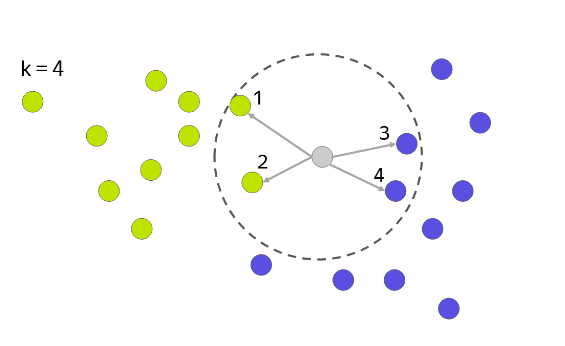

Рассмотрим ниже пример использования:

### 1.Импортируем классификатор

In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN

### 2.Обучаем

In [26]:
model = KNN(n_neighbors=4)
model.fit(X, y)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 3.Предсказываем результат

In [27]:
model.predict(np.array([[2, 0], [0, 2]]))

array([0., 0.])

### 4.Предсказываем вероятности попадания в класс (не всегда доступен этот метод)

In [28]:
model.predict_proba(np.array([[2, 0], [0, 2]]))


array([[0.5, 0.5],
       [0.5, 0.5]])

### 5.Предскажем результат для всей плоскости

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


<Figure size 700x700 with 0 Axes>

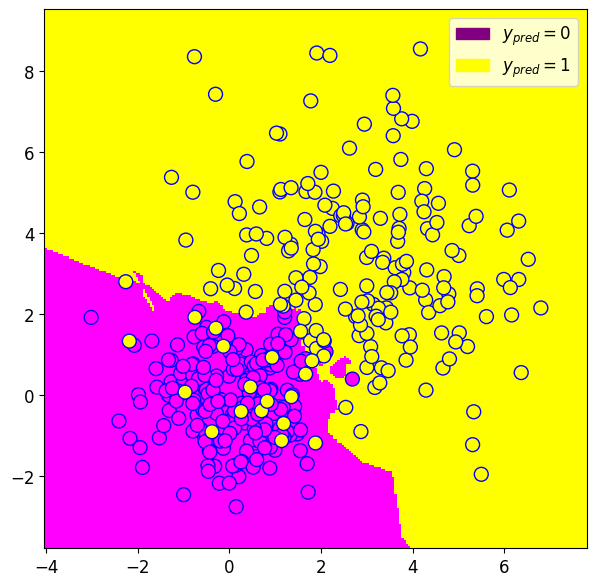

In [29]:
plt.figure(figsize=(7, 7))
plot_model(X, y, model, proba=False)


,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


<Figure size 700x700 with 0 Axes>

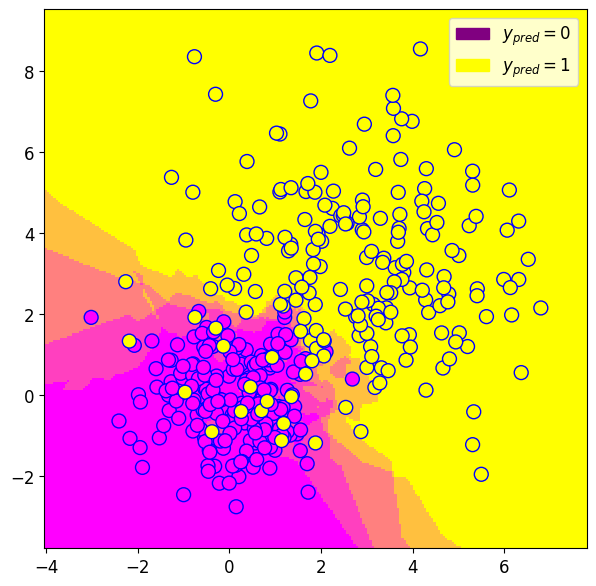

In [30]:
plt.figure(figsize=(7, 7))
plot_model(X, y, model, proba=True)

Алгоритм классификации объекта:
 - Вычислить расстояние до каждого из объектов обучающей выборки
 - Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
 - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей
 
 Ленивость - вычисления начинаются только в момент классификации тестового примера.

Скорость - при большом количестве объектов в тесте, алгоритм будет долго работать для **каждого** предсказания.

**Вопрос:** А как можно ускорить процесс классификации через KNN?

По факту здесь **не происходит обучения** в обычном его понимании: мы просто загружаем все данные в память, не проделывая над ними какой-то явной работы для получения хорошо работающего алгоритма.

**Вопрос:** А как можно модифицировать алгоритм?

[Алгоритм в анимации](https://www.tomasbeuzen.com/animated-data/content/supervised-learning/k-nearest-neighbours.html)

# Итоги

### Основные понятия машинного обучения
* **`Объект`** (экземпляр, пример) — единица данных, описываемая набором признаков.

* **`Ответ`** (целевая переменная) — значение, которое модель должна предсказать для объекта (например, класс или число).

* **`Признак`** (фича, атрибут) — измеряемая характеристика объекта, используемая моделью для обучения и предсказания.

* **`Функция потерь`** (Loss function) — метрика, измеряющая ошибку предсказания модели на одном объекте. Определяет, насколько предсказание отличается от истинного ответа.

* **`Модель`** — алгоритм или математическое выражение, которое преобразует входные признаки в предсказание. Может иметь параметры, настраиваемые в процессе обучения.

* **`Метод обучения`** — процедура подбора параметров модели для минимизации ошибки на обучающих данных.

* **`Эмпирический риск`** (Empirical risk) — среднее значение функции потерь на всей обучающей выборке. Основная цель обучения — минимизировать этот риск.

* **`Переобучение`** (Overfitting) — ситуация, когда модель слишком хорошо "запоминает" обучающие данные (включая шум и случайные колебания), теряя способность к обобщению на новые, ранее не виденные данные.

### Постановка задачи: ДНК (Дано, Найти, Критерий)
Чёткая постановка — основа решения любой задачи машинного обучения.

`Дано:` Описание входных данных (объектов, признаков) и доступной информации (например, размеченная обучающая выборка).

`Найти:` Требуемый результат — параметры модели или алгоритм, который будет выполнять целевое действие (классифицировать, предсказывать, группировать).

`Критерий` (Цель): Формальная метрика, которую необходимо оптимизировать (например, минимизировать ошибку на тестовых данных или эмпирический риск).

# Источники
1. [Курс К. В. Воронцова] (http://www.machinelearning.ru/wiki/index.php?title=Машинное_обучение_%28курс_лекций%2C_К.В.Воронцов%29)
2. Яндекс. [Хэндбук по ML] (https://education.yandex.ru/handbook/ml/article/mashinnoye-obucheniye)
3. С. Николенко. Глубокое обучение. Погружение в мир нейронных сетей